 **BOOTCAMP DGC**

El presente proyecto tiene como objetivo analizar los factores que tienen un mayor impacto en las notas de los alumnos y a realizar la predicción de las notas de los alumnos en base a sus características usando aprendizaje automático como es la regresión lineal múltiple. De esta manera, se podrá desarrollará una vista más completa y detallada sobre los factores que inciden en el desempeño estudiantil y así crear planes de estratégicos para promover el éxito académico de los estudiantes. Asimismo, este modelo se implementó en el servicio de la nube Azure para la automatización de procesos, entrenamiento y que sea usado a través de un endpoint para proporcionar conectividad a más aplicaciones clientes, obtener resultados de predicción en tiempo real y tener un mayor alcance.

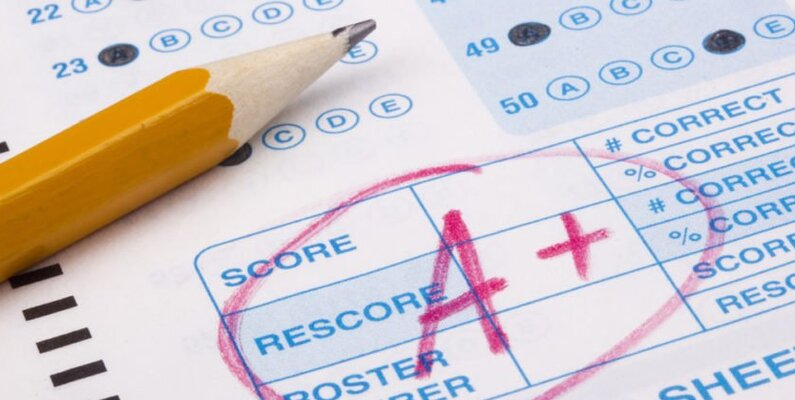

# Importación de librerias


In [127]:
!pip install fancyimpute

In [128]:

import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from fancyimpute import KNN
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.linear_model import LinearRegression


# Carga del dataset

Conexión del archivo de datos .csv

In [129]:

df_main = pd.read_csv("https://raw.githubusercontent.com/David5761/Proyecto_Final_DavidToledo/main/Expanded_data_with_more_features.csv")
df_main


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [130]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [131]:
#Estadísticas básicas
df_main.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [132]:
df_main.shape

(30641, 15)

# Limpieza y preprocesamiento de datos

<Axes: >

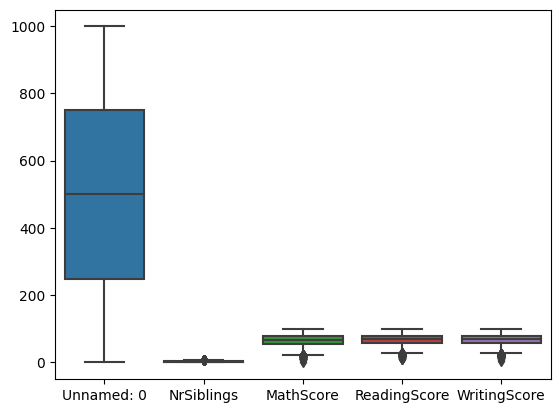

In [133]:
#Visualización de posibles outliers
sns.boxplot(data=df_main)

Los datos que contienen al menos un valor nulo en una de sus variables

In [134]:
df_main[df_main.isna().any(axis=1)]

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50
10,10,male,group C,associate's degree,standard,none,NaN,sometimes,yes,1.0,private,5 - 10,58,54,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30627,730,female,group A,high school,standard,completed,married,never,no,NaN,school_bus,> 10,58,77,82
30628,744,female,group B,NaN,free/reduced,none,single,sometimes,no,1.0,school_bus,5 - 10,55,63,63
30629,748,female,group D,associate's degree,standard,completed,married,sometimes,no,2.0,school_bus,NaN,67,63,72
30634,785,male,group A,associate's degree,free/reduced,completed,NaN,sometimes,no,2.0,school_bus,5 - 10,65,60,60


Saber las columnas con valores faltantes

In [135]:
df_main.columns[df_main.isna().any()]

Index(['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus',
       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
       'WklyStudyHours'],
      dtype='object')

Comprobar si existen instancias con todas las variables con valores faltantes

In [136]:
df_main[df_main.isna().all(axis=1)]

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


Cantidad de valores faltantes por columna

In [137]:
df_main.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Se elimina las columnas que no nos darán información relevante y las que tengan mayor al 10% de valores faltantes

In [138]:
#Haciendo el análisis general de cada columna, vemos que la columna Unnamed: 0 no tiene función, por lo tanto se procede a eliminar.
df_main.drop('Unnamed: 0',axis=1,inplace=True)

#En esta columna existe más del 10% de datos faltantes y no es tan revelante
df_main.drop('TransportMeans',axis=1,inplace=True)
df_main

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,5 - 10,82,90,93


Grafica para saber la representación de los datos faltantes en el dataset

<Axes: >

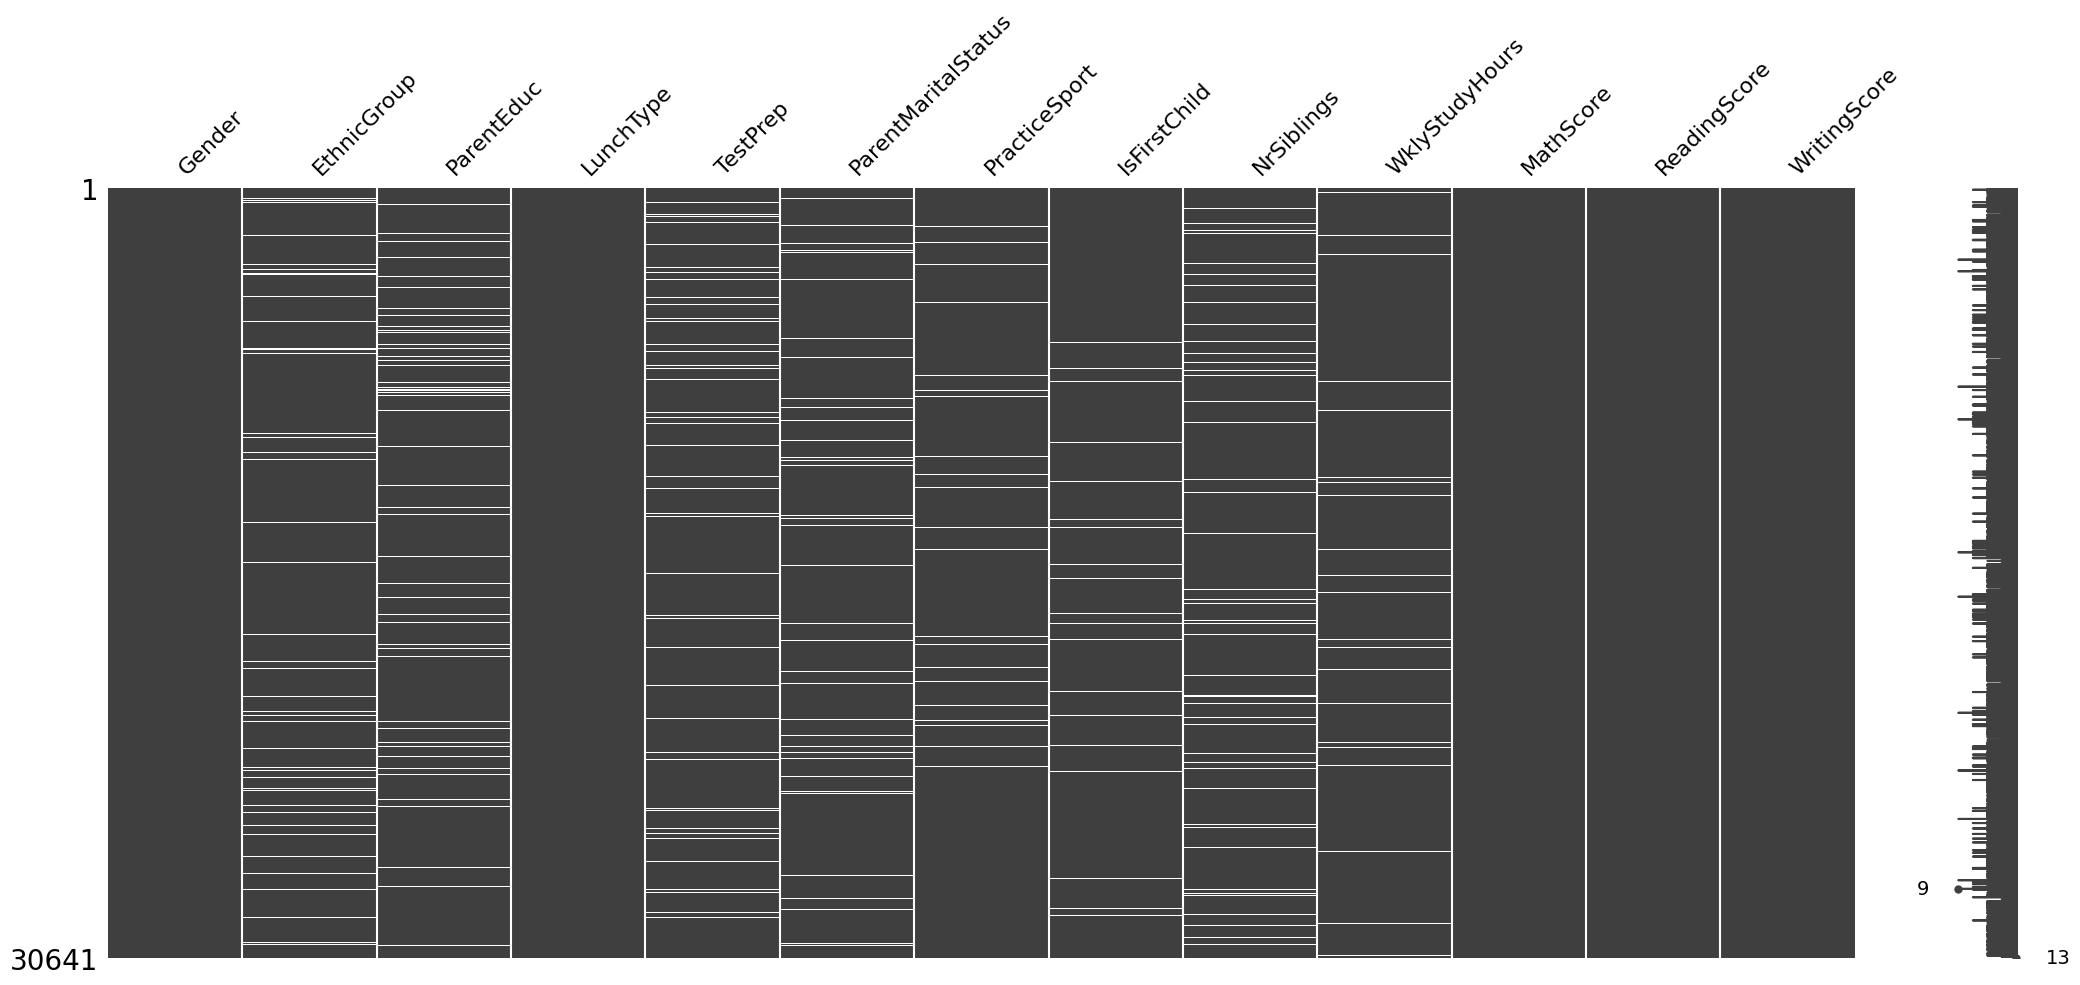

In [139]:
ms.matrix(df_main)

In [140]:
df_main.isna().sum().sum()

10767

**Imputación de datos en las variables usando moda**
---



In [141]:
#Imputación de datos por mediana
median_siblings = df_main['NrSiblings'].median()

df_main[df_main['NrSiblings'].isna()]


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,< 5,37,59,50
34,male,group E,associate's degree,standard,completed,single,sometimes,no,NaN,5 - 10,81,81,79
44,female,group C,high school,standard,none,married,regularly,yes,NaN,5 - 10,67,72,77
50,female,NaN,some high school,free/reduced,completed,married,regularly,yes,NaN,> 10,75,86,90
56,male,group A,some high school,free/reduced,none,married,sometimes,yes,NaN,5 - 10,39,39,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30565,female,group A,bachelor's degree,standard,none,married,regularly,no,NaN,< 5,71,79,78
30596,male,group C,bachelor's degree,standard,none,married,regularly,no,NaN,5 - 10,54,44,47
30602,male,group D,some college,standard,none,married,sometimes,no,NaN,< 5,76,74,71
30614,male,group D,bachelor's degree,standard,none,divorced,sometimes,no,NaN,5 - 10,82,73,80


In [142]:
print("Valor de mediana de la columan de siblings: ",median_siblings)
df_main['NrSiblings'] = df_main['NrSiblings'].fillna(median_siblings)
print("Cantidad de valores nulos en la columan NrSiblings ahora: ",len(df_main[df_main['NrSiblings'].isna()]))
print("Cantidad de instancias con valores nulos ahora: ", len(df_main[df_main.isna().any(axis=1)]))

Valor de mediana de la columan de siblings:  2.0
Cantidad de valores nulos en la columan NrSiblings ahora:  0
Cantidad de instancias con valores nulos ahora:  8083


In [143]:
df_main

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,5 - 10,82,90,93


Mostrar las instancias que tienen como mínimo una variable con datos faltantes

In [144]:
df_main[df_main.isna().any(axis=1)]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,5 - 10,69,90,88
10,male,group C,associate's degree,standard,none,NaN,sometimes,yes,1.0,5 - 10,58,54,52
15,female,group C,some high school,standard,none,married,sometimes,yes,0.0,NaN,69,75,78
16,male,group C,high school,standard,NaN,married,sometimes,yes,0.0,5 - 10,88,89,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,female,NaN,some high school,free/reduced,completed,single,sometimes,no,3.0,5 - 10,47,65,68
30628,female,group B,NaN,free/reduced,none,single,sometimes,no,1.0,5 - 10,55,63,63
30629,female,group D,associate's degree,standard,completed,married,sometimes,no,2.0,NaN,67,63,72
30634,male,group A,associate's degree,free/reduced,completed,NaN,sometimes,no,2.0,5 - 10,65,60,60


Imputación por moda en variables con pocos valores Nan

In [145]:
df_main['PracticeSport'].fillna(value = df_main['PracticeSport'].mode()[0],inplace=True)
df_main['IsFirstChild'].fillna(value = df_main['IsFirstChild'].mode()[0],inplace=True)
df_main['WklyStudyHours'].fillna(value = df_main['WklyStudyHours'].mode()[0],inplace=True)

In [146]:
print("Cantidad de instancias con valores nulos ahora: ", len(df_main[df_main.isna().any(axis=1)]))

Cantidad de instancias con valores nulos ahora:  6167


In [147]:
df_main.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport             0
IsFirstChild              0
NrSiblings                0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Imputación de las demás variables categoricas usando moda

---



In [148]:
#Imputación por moda en variables con pocos valores Nan
df_test_moda = df_main.copy()
df_test_moda['EthnicGroup'].fillna(value = df_test_moda['EthnicGroup'].mode()[0],inplace=True)
df_test_moda['ParentEduc'].fillna(value = df_test_moda['ParentEduc'].mode()[0],inplace=True)
df_test_moda['TestPrep'].fillna(value = df_test_moda['TestPrep'].mode()[0],inplace=True)
df_test_moda['ParentMaritalStatus'].fillna(value = df_test_moda['ParentMaritalStatus'].mode()[0],inplace=True)
df_test_moda



,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,5 - 10,58,53,51
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,5 - 10,82,90,93


Codificación one hot definidas para ordinales y nominales

In [149]:
encoders = {}
categorical_columns = ["Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep",
                       "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "WklyStudyHours"]
df_dummies_mode = df_test_moda.copy()

ParentEduc_ord = ['some high school','high school','some college',"associate's degree", "bachelor's degree","master's degree"]
PracticeSport_ord = ['never','sometimes','regularly']
WklyStudyHours_ord = ['< 5','5 - 10','> 10']

df_dummies_mode[categorical_columns] = df_dummies_mode[categorical_columns].fillna('Missing')

for column in categorical_columns:
    if column == 'ParentEduc':
       ord_enc = OrdinalEncoder(categories=[ParentEduc_ord])
    elif column == 'PracticeSport':
       ord_enc = OrdinalEncoder(categories=[PracticeSport_ord])
    elif column == 'WklyStudyHours':
       ord_enc = OrdinalEncoder(categories=[WklyStudyHours_ord])
    elif column in ('Gender', 'TestPrep', 'IsFirstChild'):
       ord_enc = OrdinalEncoder()
    else:
      ord_enc = OneHotEncoder(sparse_output=False)
    if column in ('EthnicGroup', 'ParentMaritalStatus'):
      codificacion = ord_enc.fit_transform(df_dummies_mode[[column]])
      column_names = ord_enc.get_feature_names_out([column])
      new_columns = pd.DataFrame(codificacion, columns=column_names)
      df_dummies_mode = pd.concat([df_dummies_mode, new_columns], axis=1)
    else:
      df_dummies_mode[column] = ord_enc.fit_transform(df_dummies_mode[[column]])
    encoders[column] = ord_enc

df_dummies_mode.drop(columns=['EthnicGroup', 'ParentMaritalStatus'], axis=1, inplace=True)
df_dummies_mode


,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,0.0,4.0,0.0,1.0,2.0,1.0,3.0,0.0,71,71,74,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,69,90,88,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,5.0,0.0,1.0,1.0,1.0,4.0,0.0,87,93,91,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,45,56,42,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,59,61,65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
30637,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,58,53,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30638,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,61,70,67,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30639,0.0,3.0,0.0,0.0,2.0,0.0,3.0,1.0,82,90,93,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Codificación one-hot general

In [150]:
df_code_mode = df_test_moda.copy()
df_code_mode = pd.get_dummies(data=df_code_mode)
df_code_mode

,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,...,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,3.0,71,71,74,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0.0,69,90,88,1,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
2,4.0,87,93,91,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
3,1.0,45,56,42,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0.0,76,78,75,0,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2.0,59,61,65,1,0,0,0,0,1,...,1,0,0,0,1,1,0,1,0,0
30637,1.0,58,53,51,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
30638,1.0,61,70,67,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
30639,3.0,82,90,93,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


Exploramos la correlación de las variables

<ipython-input-151-1336a8301cca>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_code_mode.corr(), dtype=np.bool))


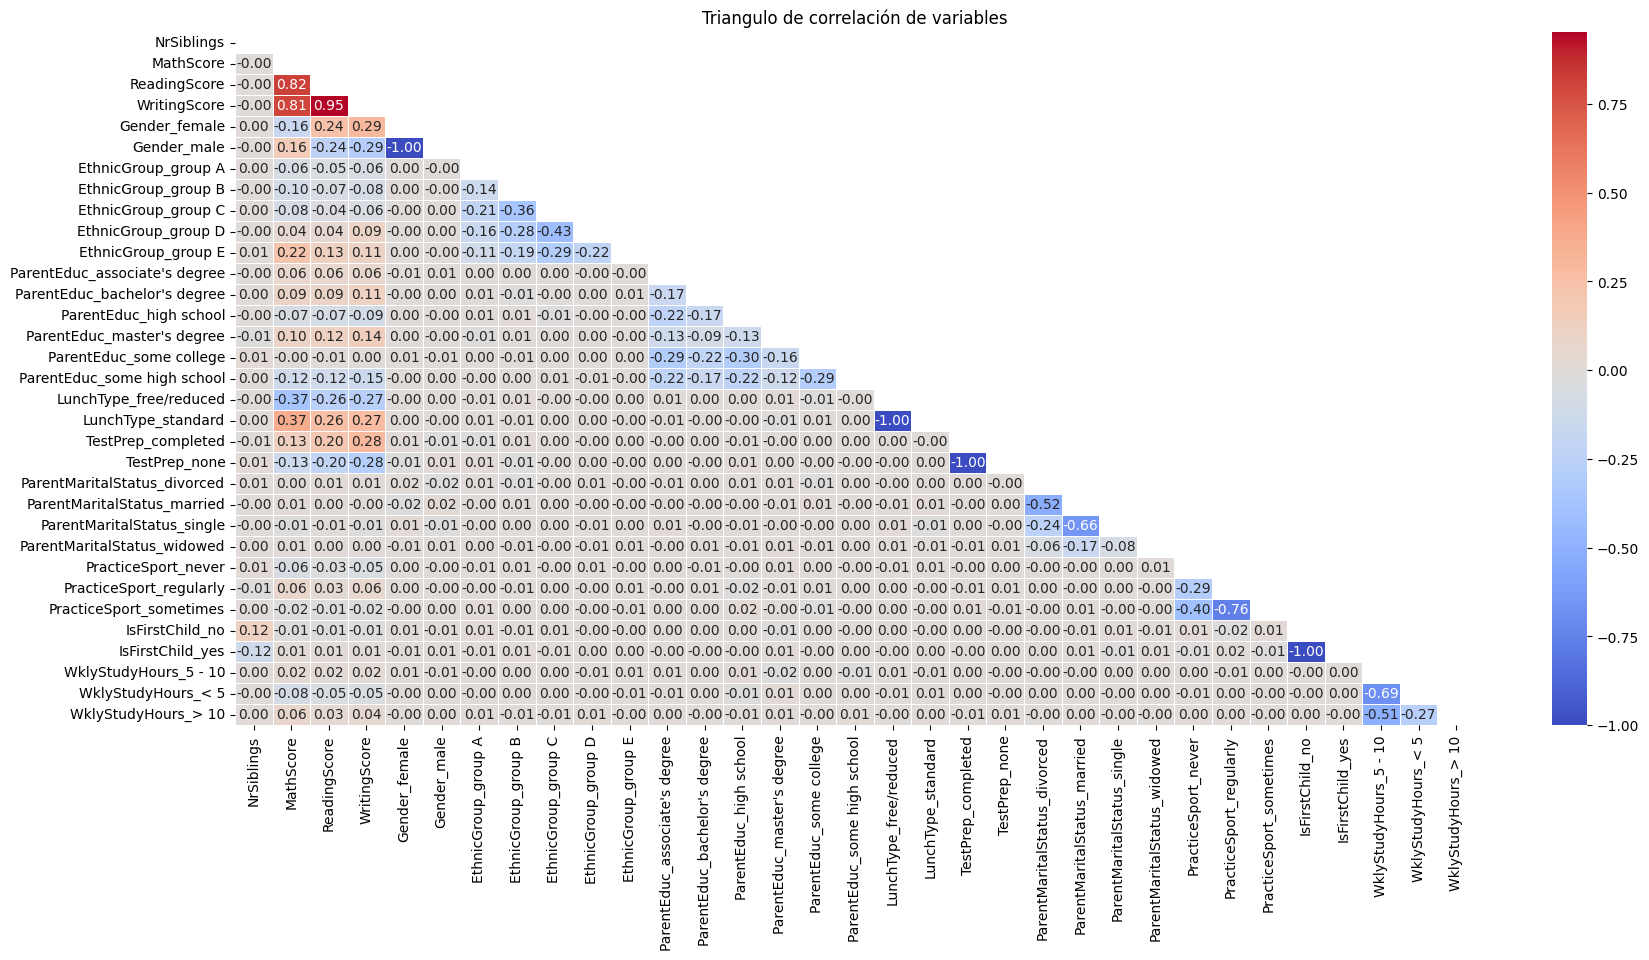

In [151]:
correlation_matrix = df_code_mode.corr()
# Gráfica
plt.figure(figsize=(20, 9))
mask = np.triu(np.ones_like(df_code_mode.corr(), dtype=np.bool))
sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Triangulo de correlación de variables")
plt.show()




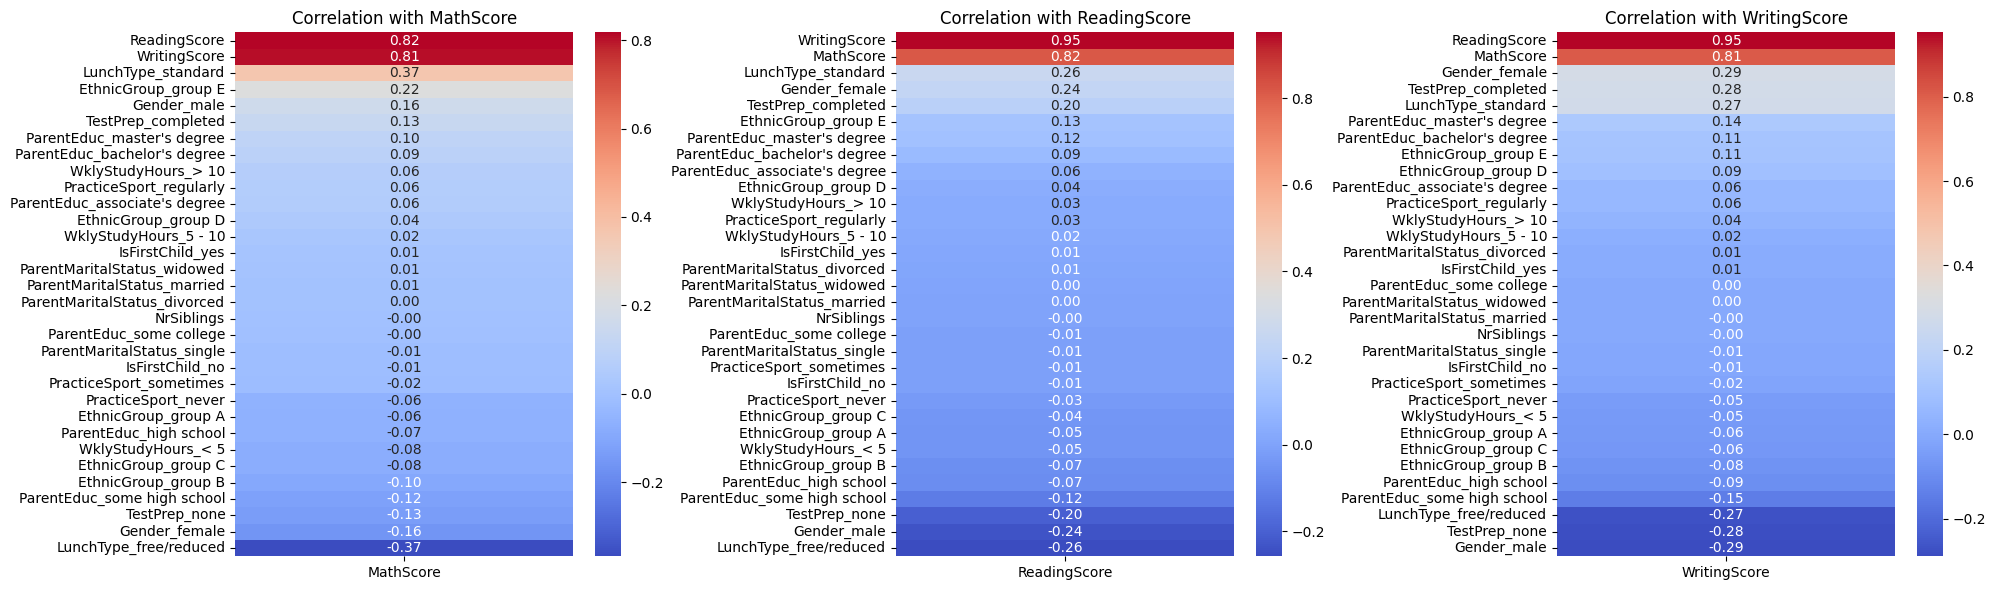

In [152]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) #Creación de 3 graficos horizontales

score_columns = ['MathScore', 'ReadingScore', 'WritingScore']

for idx, score_column in enumerate(score_columns):
    #Crear mapa de calor de las columnas requeridas de score_columns con todas las variables
    corr = df_code_mode.corr()
    target_corr = corr[score_column].drop(score_column)

    # Ordenar de forma descendente
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Convertir las series de pandas en un dataframe
    target_corr_sorted_df = target_corr_sorted.to_frame()

    sns.heatmap(target_corr_sorted_df, cmap="coolwarm", annot=True, fmt='.2f',
                cbar_kws={'orientation': 'vertical'}, ax=axs[idx])
    axs[idx].set_title(f'Correlation with {score_column}')

plt.tight_layout() # to prevent overlap
plt.show()


**Análisis de correlaciones**

De la siguiente matriz, podemos observar que la mayor parte de variables en este set de datos no son tan determinantes y no influyen mucho en los resultados de los exámenes. Sin embargo, de las variables que tienen una mayor correlación con las notas, podemos observar que comparten algunas variables que influyen en las tres notas. Una de las más influyentes es del tipo de alimentación que se alimenta el estudiante. Se puede observar que una mejor calidad de alimentación tiene un gran relevancia en el desarrollo académico del estudiante.

Asimismo, podemos notar que los estudiantes que tuvieron una preparación anterior completa, pudieron obtener mejores resultados en dichos examenes. Otro factor relevante es del tipo de genero del estudiante. Esto probablemente se debería considera un sesgo ético en este análisis y se debe a las influencias e ideas sociales sobre que el tipo de genero determina tus gustos y rendimiento en determinados cursos. Además, el grupo étnico también tuvo una tendencia fuerte en las notas, mientras que algunos alumnos de otros grupos étnicos tendieron a no estar correlacionados con las notas.

Por otro lado, algunas de las variables que tuvieron un impacto intermedio son del grado de educación que tuvieron los padres y de las horas semanales de estudio. Probablemente, esto se deba a que los padres depende de su grado académico puedan dar soporte a sus hijos para resolver algunas dudas en cualquier momento.  Por último, algunos de los factores que tienen una menor relevancia, son de la frecuencia en la que los alumnos que hacen deporte tienden a tener mejores notas.

Es importante tener en claro que las correlaciones no siempre implican causalidad. Es decir, que dos variables esten correlacionadas, no significa que una causa la otra. Esta correlación puede cambiar con el cambio de algunas otras variables, incluso las que se muestran que no tienen ningún tipo de correlación con las notas.

**Intento de imputación de datos usando KNN (ORDINAL A LAS VARIABLES CATEGORICAS)**
---



Durante el proceso de imputación de datos utilizando el algoritmo KNN, me he enfrentado a una dificultad específica. Para poder utilizar KNN de manera efectiva, se requiere realizar una codificación de las variables categóricas en función de su tipo, ya sea ordinal o nominal. Sin embargo, aquí es donde surge el problema: al aplicar la codificación One-Hot a las variables nominales, se generan múltiples columnas, lo que complica el proceso adecuado del algoritmo. Ante esta situación, he decidido emplear la imputación por moda como una solución viable. Aunque esta estrategia podría introducir cierto sesgo en los datos al utilizar la codificación ordinal, resulta ser la mejor alternativa en este caso particular. Es importante destacar que, al analizar la matriz de correlación resultante, se observa que la correlación entre las variables no varía significativamente en comparación con el uso de la imputación por moda. Por último, me gustaría destacar que el proceso y análisis realizado al intentar llevar a cabo la imputación por KNN resultó sumamente interesante y enriquecedor.



In [153]:


encoders = {}
categorical_columns = ["Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep",
                       "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "WklyStudyHours"]
df_test_ordinal = df_main.copy()

#Ahora debemos definir el orden para las variables ordinales para su codificación
#ParentEduc, PracticeSport, WklyStudyHours

ParentEduc_ord = ['Missing','some high school','high school','some college',"associate's degree", "bachelor's degree","master's degree"]
PracticeSport_ord = ['Missing','never','sometimes','regularly']
WklyStudyHours_ord = ['Missing','< 5','5 - 10','> 10']

#Reemplazamos el valor Missing a los valores Nan en las columnas, ya que el encoder
#no renoce valores Nan
df_test_ordinal.fillna('Missing',inplace=True)

for column in categorical_columns:
    if column =='ParentEduc':
      ord_enc = OrdinalEncoder(categories=[ParentEduc_ord])
    elif column == 'PracticeSport':
      ord_enc = OrdinalEncoder(categories=[PracticeSport_ord])
    elif column == 'WklyStudyHours':
       ord_enc = OrdinalEncoder(categories=[WklyStudyHours_ord])
    else:
      ord_enc = OrdinalEncoder()
    # Ajustar y transformar los datos
    df_test_ordinal[column] = ord_enc.fit_transform(df_test_ordinal[[column]])
    # Guardar el codificador en el diccionario
    encoders[column] = ord_enc

df_test_ordinal



,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0.0,0.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0,1.0,71,71,74
1,0.0,3.0,3.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,69,90,88
2,0.0,2.0,6.0,1.0,2.0,3.0,2.0,1.0,4.0,1.0,87,93,91
3,1.0,1.0,4.0,0.0,2.0,2.0,1.0,0.0,1.0,2.0,45,56,42
4,1.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0.0,4.0,2.0,1.0,2.0,3.0,2.0,0.0,2.0,2.0,59,61,65
30637,1.0,5.0,2.0,1.0,2.0,3.0,3.0,0.0,1.0,2.0,58,53,51
30638,0.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,61,70,67
30639,0.0,4.0,4.0,1.0,1.0,2.0,3.0,0.0,3.0,2.0,82,90,93


KNN USANDO SOLO CODIFICACION ORDINAL

In [154]:
#Volvemos a poner los valores cambiados de Nan a Missing, a Nan.
df_test_ordinal['EthnicGroup'] = df_test_ordinal['EthnicGroup'].replace(0.0,np.nan)
df_test_ordinal['ParentEduc'] = df_test_ordinal['ParentEduc'].replace(0.0,np.nan)
df_test_ordinal['TestPrep'] = df_test_ordinal['TestPrep'].replace(0.0,np.nan)
df_test_ordinal['ParentMaritalStatus'] = df_test_ordinal['ParentMaritalStatus'].replace(0.0,np.nan)
# Luego, creamos el imputador KNN
imputer = KNNImputer(n_neighbors=3)

# Realizamos la imputación
df_imputed = imputer.fit_transform(df_test_ordinal)

# Convertimos el resultado de nuevo a un DataFrame
df_imputed = pd.DataFrame(df_imputed, columns = df_test_ordinal.columns)
df_imputed

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0.0,4.666667,5.0,1.0,2.0,2.0,3.0,1.0,3.0,1.0,71.0,71.0,74.0
1,0.0,3.000000,3.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,69.0,90.0,88.0
2,0.0,2.000000,6.0,1.0,2.0,3.0,2.0,1.0,4.0,1.0,87.0,93.0,91.0
3,1.0,1.000000,4.0,0.0,2.0,2.0,1.0,0.0,1.0,2.0,45.0,56.0,42.0
4,1.0,3.000000,3.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0.0,4.000000,2.0,1.0,2.0,3.0,2.0,0.0,2.0,2.0,59.0,61.0,65.0
30637,1.0,5.000000,2.0,1.0,2.0,3.0,3.0,0.0,1.0,2.0,58.0,53.0,51.0
30638,0.0,3.666667,2.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,61.0,70.0,67.0
30639,0.0,4.000000,4.0,1.0,1.0,2.0,3.0,0.0,3.0,2.0,82.0,90.0,93.0


In [155]:
#Redondeamos los valores a enteros para su próximo uso en la transformación inversa
df_imputed = df_imputed.round().astype(int)
df_imputed[0:33]


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,5,5,1,2,2,3,1,3,1,71,71,74
1,0,3,3,1,2,2,2,1,0,2,69,90,88
2,0,2,6,1,2,3,2,1,4,1,87,93,91
3,1,1,4,0,2,2,1,0,1,2,45,56,42
4,1,3,3,1,2,2,2,1,0,2,76,78,75
5,0,2,4,1,2,2,3,1,1,2,73,84,79
6,0,2,3,1,1,4,1,0,1,2,85,93,89
7,1,2,3,0,2,2,2,1,1,3,41,43,39
8,1,4,2,0,1,3,2,0,3,3,65,64,68
9,0,2,2,0,2,2,3,1,2,1,37,59,50


PROCESO DE NUMERICAS A VALORES ANTERIORES

In [156]:
#Hacemos una copia para su transformación inversa
df_main_cleaned_ordinal = df_imputed.copy()

for column in categorical_columns:
    # Obtener el codificador original
    ord_enc = encoders[column]
    # Transformar los datos de vuelta a su forma categórica
    df_main_cleaned_ordinal[column] = ord_enc.inverse_transform(df_main_cleaned_ordinal[[column]])

df_main_cleaned_ordinal[:33]




,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group E,bachelor's degree,standard,none,married,regularly,yes,3,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,2,< 5,37,59,50


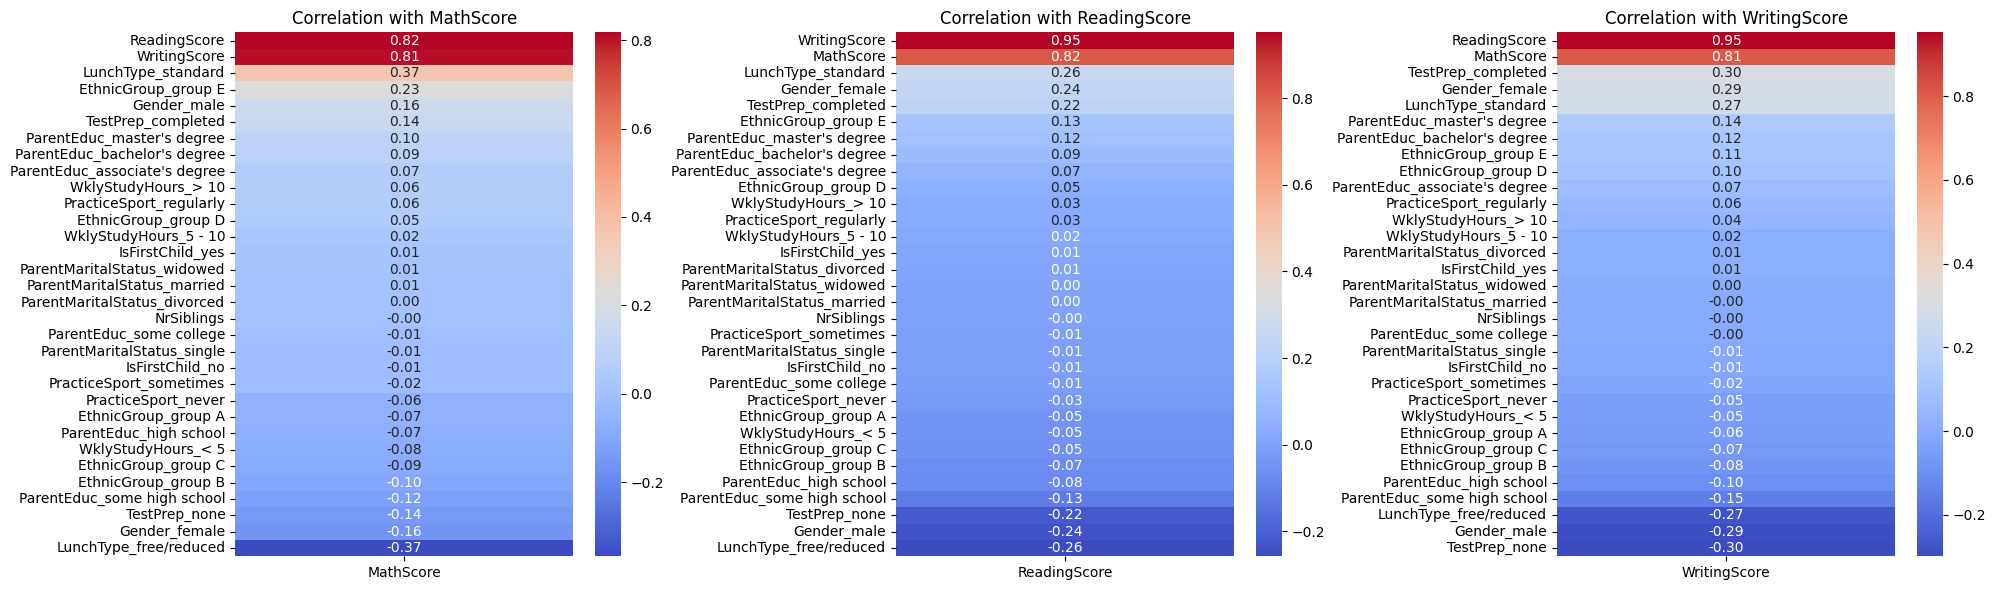

In [157]:
df_code_mode = df_main_cleaned_ordinal.copy()
df_code_mode = pd.get_dummies(data=df_code_mode)
df_code_mode
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6)) # 3 plots horizontally

score_columns = ['MathScore', 'ReadingScore', 'WritingScore']

for idx, score_column in enumerate(score_columns):
    # Create a heatmap of the correlations with the target column
    corr = df_code_mode.corr()
    target_corr = corr[score_column].drop(score_column)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Convert series to DataFrame and Transpose it
    target_corr_sorted_df = target_corr_sorted.to_frame()

    sns.heatmap(target_corr_sorted_df, cmap="coolwarm", annot=True, fmt='.2f',
                cbar_kws={'orientation': 'vertical'}, ax=axs[idx]) # plot on the current subplot
    axs[idx].set_title(f'Correlation with {score_column}')

plt.tight_layout() # to prevent overlap
plt.show()

IMPUTACION KNN HACIENDO CODIFICACION A CADA VARIABLE NOMINAL Y ORDINAL USANDO GET DUMMIES Y ORDINAL

---



In [158]:


encoders = {}
categorical_columns = ["Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep",
                       "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "WklyStudyHours"]
df_test_dummies = df_main.copy()

ParentEduc_ord = ['Missing','some high school','high school','some college',"associate's degree", "bachelor's degree","master's degree"]
PracticeSport_ord = ['Missing','never','sometimes','regularly']
WklyStudyHours_ord = ['Missing','< 5','5 - 10','> 10']

df_test_dummies[categorical_columns] = df_test_dummies[categorical_columns].fillna('Missing')

for column in categorical_columns:
    if column == 'ParentEduc':
       ord_enc = OrdinalEncoder(categories=[ParentEduc_ord])
    elif column == 'PracticeSport':
       ord_enc = OrdinalEncoder(categories=[PracticeSport_ord])
    elif column == 'WklyStudyHours':
       ord_enc = OrdinalEncoder(categories=[WklyStudyHours_ord])
    elif column in ('Gender', 'TestPrep', 'IsFirstChild'):
       ord_enc = OrdinalEncoder()
    else:
      ord_enc = OneHotEncoder(sparse_output=False)
    if column in ('EthnicGroup', 'ParentMaritalStatus'):
      codificacion = ord_enc.fit_transform(df_test_dummies[[column]])
      column_names = ord_enc.get_feature_names_out([column])
      new_columns = pd.DataFrame(codificacion, columns=column_names)
      df_test_dummies = pd.concat([df_test_dummies, new_columns], axis=1)
    else:
      df_test_dummies[column] = ord_enc.fit_transform(df_test_dummies[[column]])
    encoders[column] = ord_enc

df_test_dummies.drop(columns=['EthnicGroup', 'ParentEduc', 'LunchType', 'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours'], axis=1, inplace=True)

df_test_dummies





,Gender,TestPrep,IsFirstChild,NrSiblings,MathScore,ReadingScore,WritingScore,EthnicGroup_Missing,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_Missing,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,0.0,2.0,1.0,3.0,71,71,74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,69,90,88,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2.0,1.0,4.0,87,93,91,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,2.0,0.0,1.0,45,56,42,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2.0,1.0,0.0,76,78,75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0.0,2.0,0.0,2.0,59,61,65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30637,1.0,2.0,0.0,1.0,58,53,51,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
30638,0.0,1.0,0.0,1.0,61,70,67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30639,0.0,1.0,0.0,3.0,82,90,93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Exploración gráfica de datos completos**

---







Detección de outliers

<Axes: >

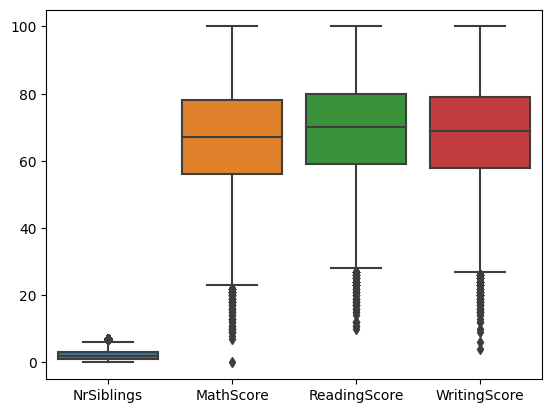

In [159]:
#Aplicamos el método boxplot de la librería seaborn indicando data como fuente de datos
sns.boxplot(data=df_test_moda)

Distribución de las notas de los alumnos

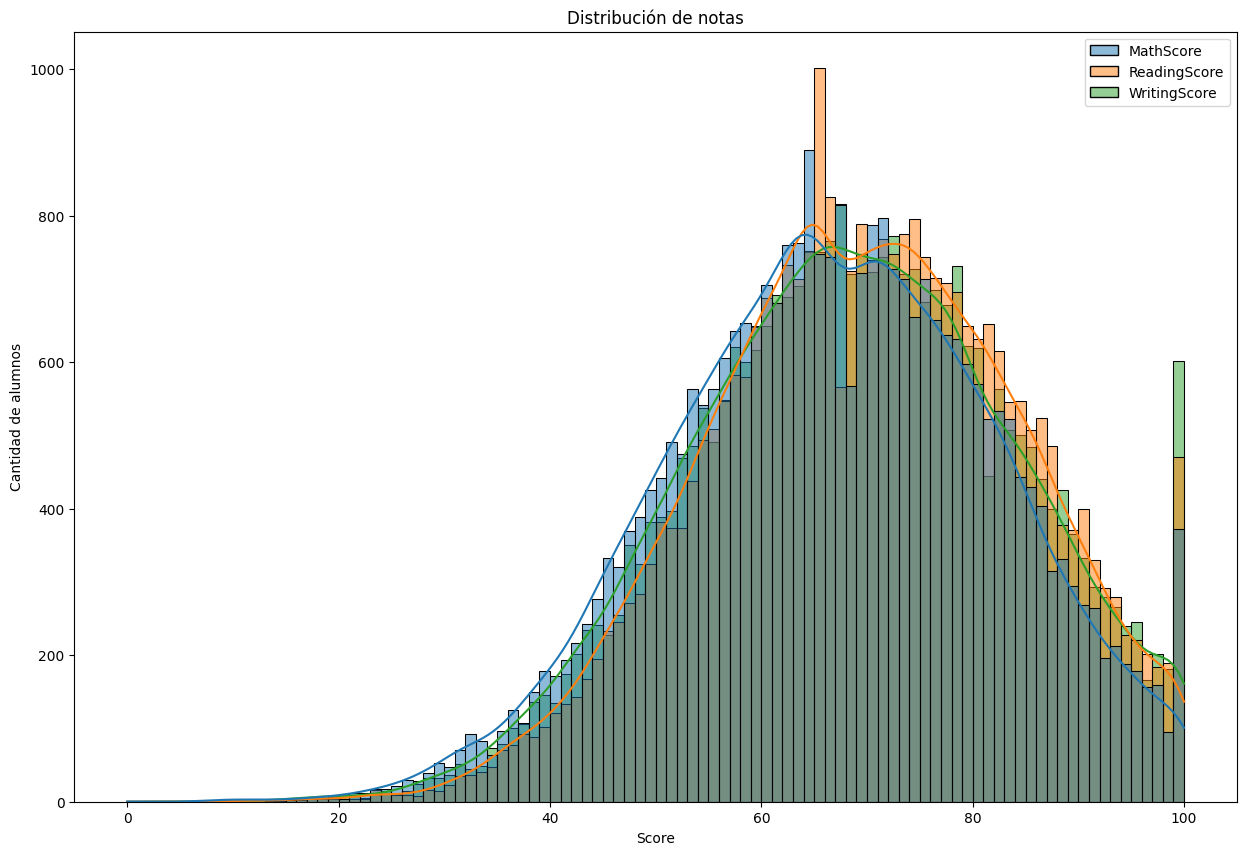

In [160]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df_test_moda[['MathScore', 'ReadingScore', 'WritingScore']], bins=100,  kde=True)
ax.set_xlabel("Score")
ax.set_ylabel("Cantidad de alumnos")
plt.title('Distribución de notas');


Gráficos de dispersión y histogramas entre las variables

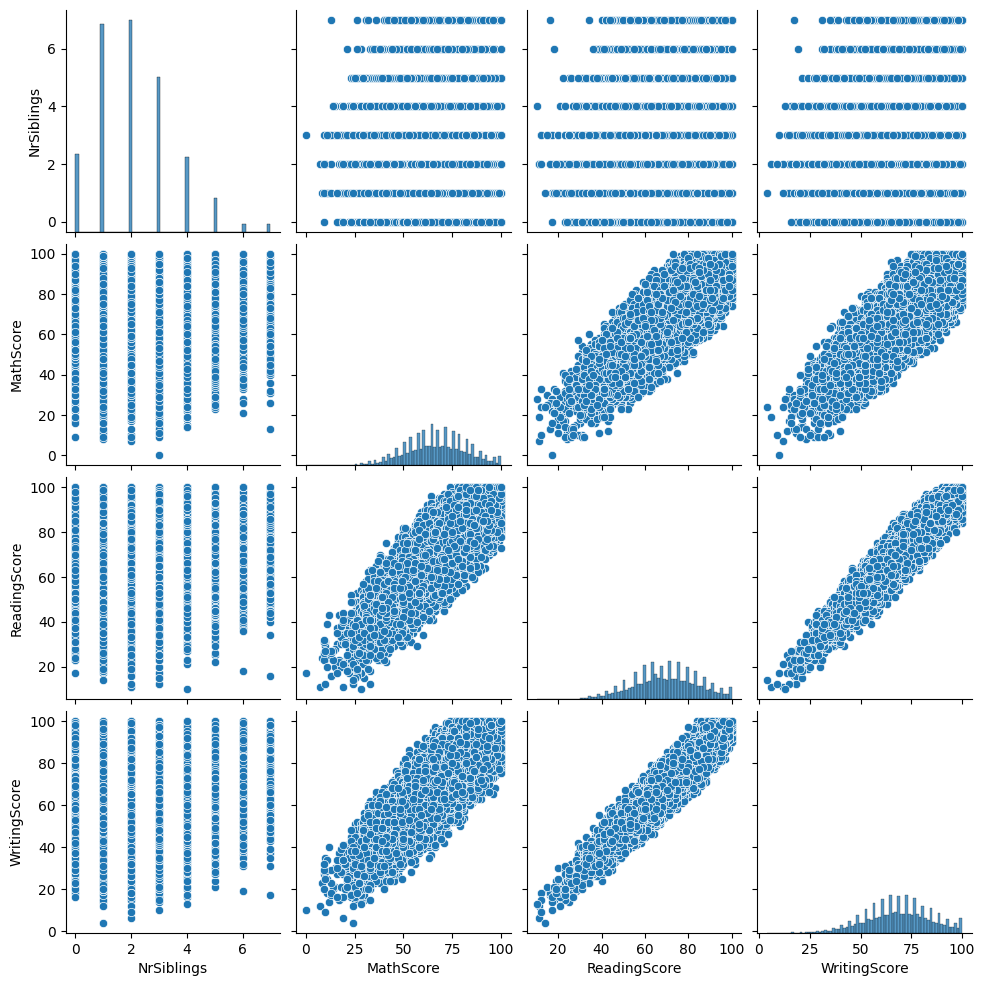

In [161]:
sns.pairplot(df_test_moda)

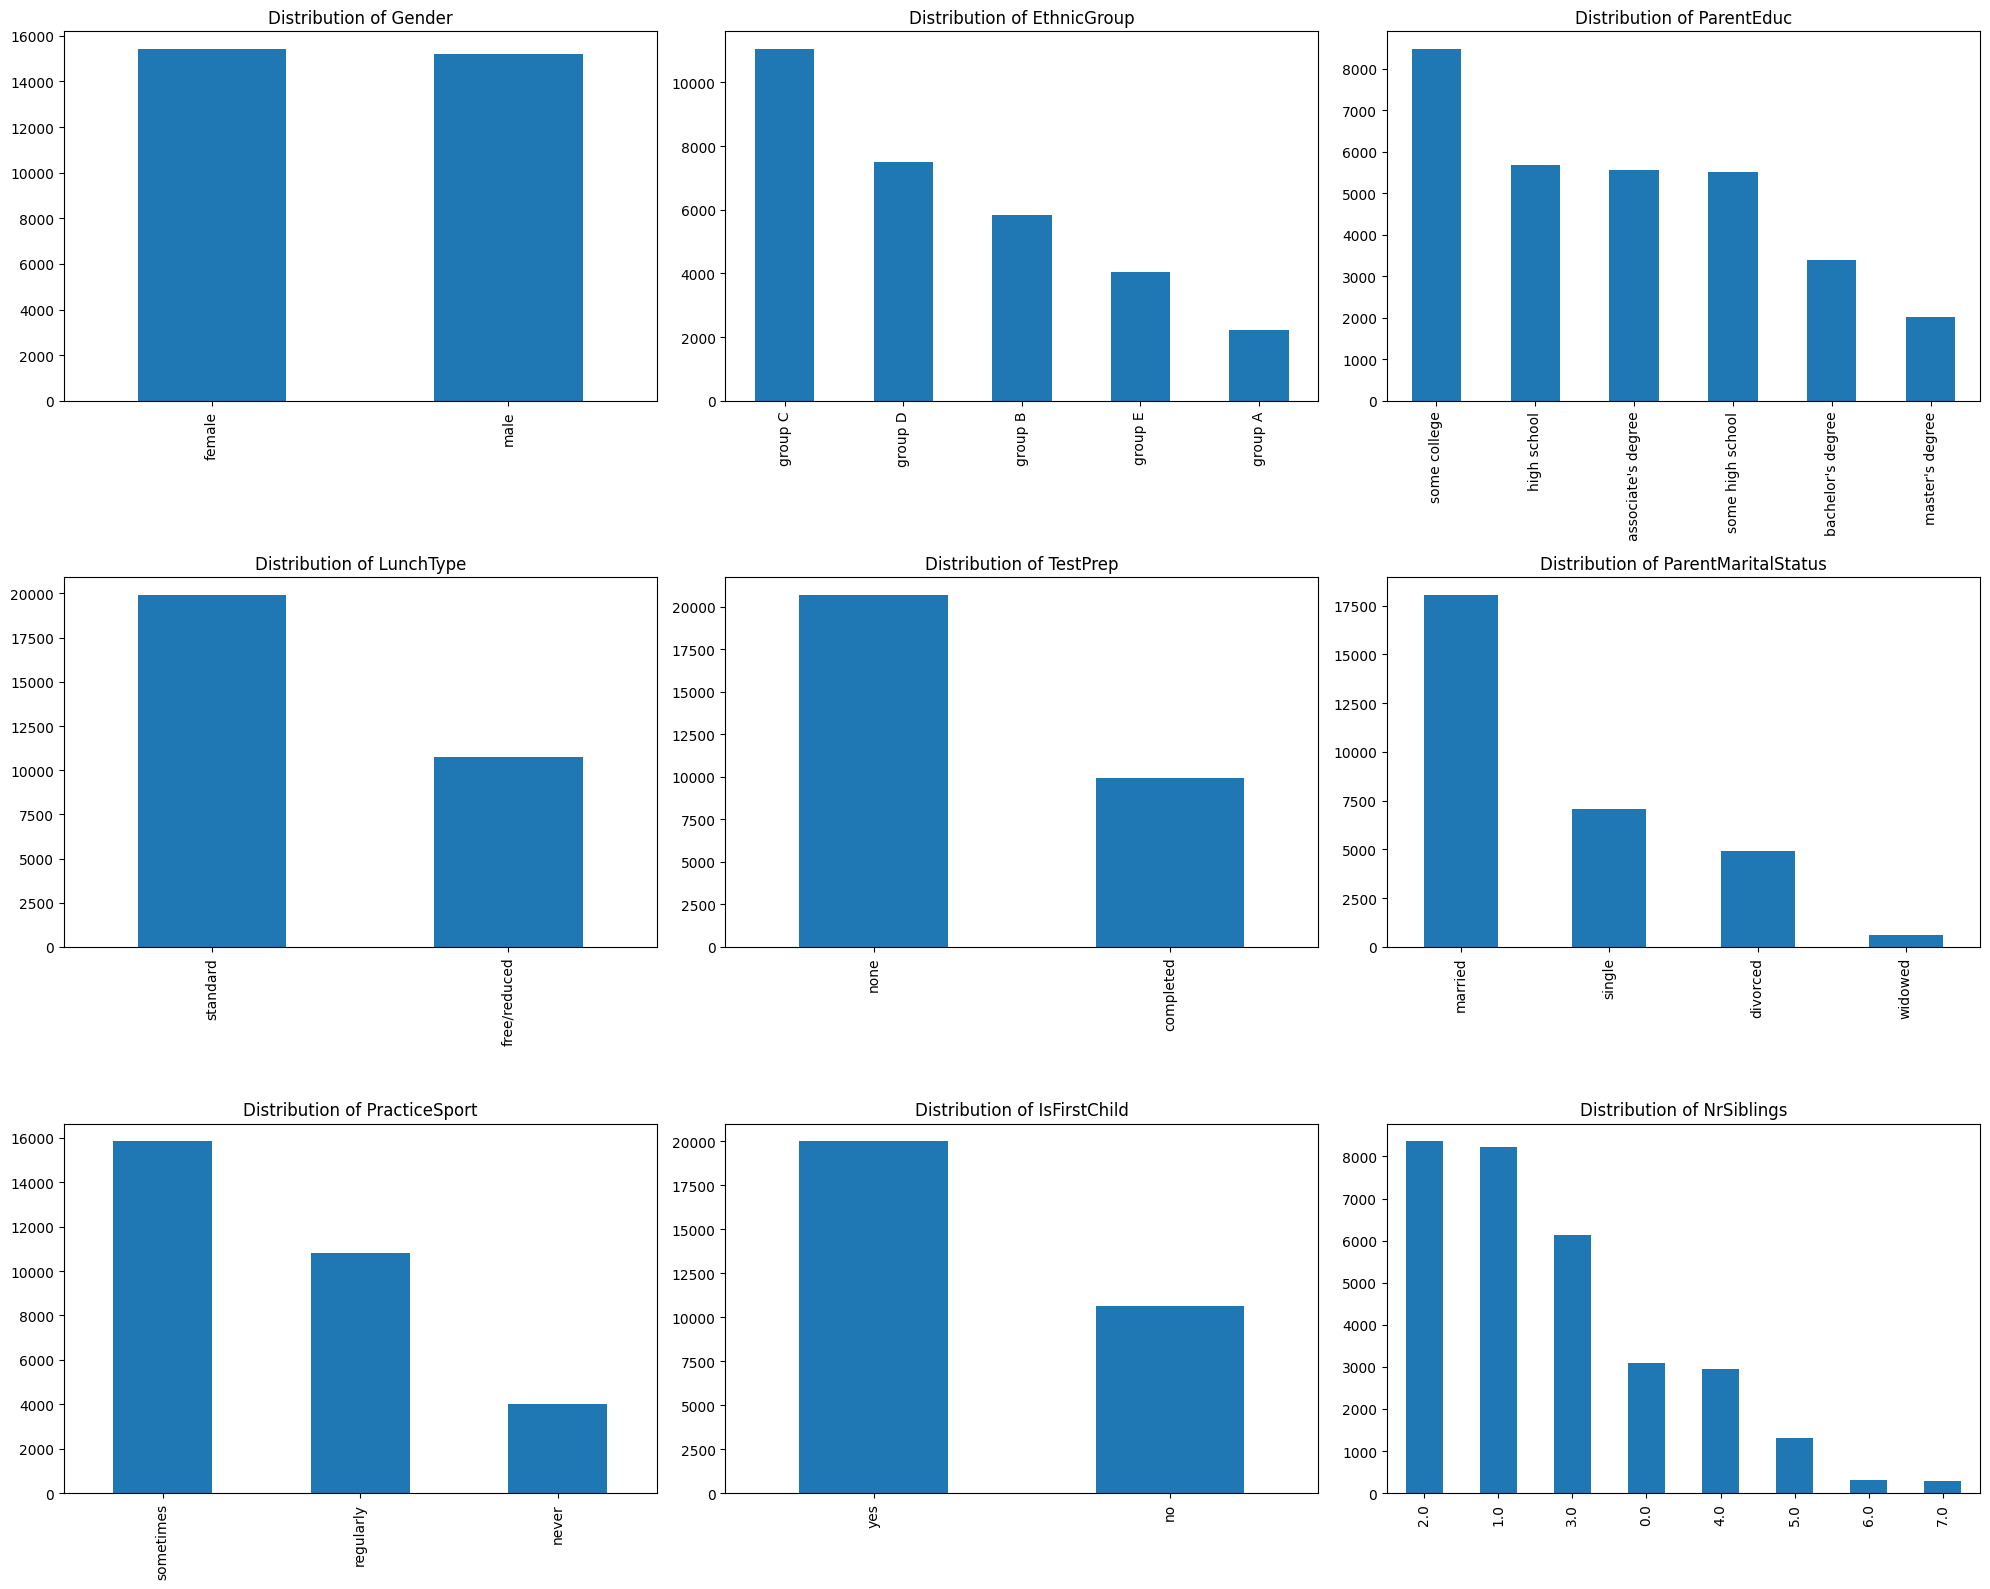

In [162]:
# Crear figura con 9 subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 16))


columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings']
for i, col in enumerate(columns):
    ax = axs[i//3, i%3]
    df_test_moda[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Ajustar los graficos
plt.tight_layout()


plt.show()

# Predicción usando regresión lineal múltiple

1) Predicción usando todas las variables predictoras, excepto a las notas de las otras materias

In [163]:
X_multiple = df_dummies_mode[["Gender", "LunchType","ParentEduc","PracticeSport","IsFirstChild","NrSiblings","EthnicGroup_group A","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E","ParentMaritalStatus_divorced","ParentMaritalStatus_married","ParentMaritalStatus_single","ParentMaritalStatus_widowed", "TestPrep", "WklyStudyHours"]]
y_multiple = df_dummies_mode['ReadingScore']
#Normalizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_multiple)
y_scaled = scaler.fit_transform(y_multiple.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.3)

#Entrenar el modelo de regresión lineal
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train,y_train)
#Predecir en el conjunto de prueba
Y_pred_multiple = lr_multiple.predict(X_test)

#Matrices de evaluación de predicción, estimación de error y regresión
predictions = lr_multiple.predict(X_test)
# Unidades de distancia de los valores reales
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
# Metrica de errores grandes del modelo
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
# Métrica de errores grandes en las mismas unidades que los datos
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Precisión del modelo:")
print(lr_multiple.score(X_train,y_train))

Mean absolute error (MAE): 0.11606384376221082
Mean square error (MSE): 0.020484775304050865
Root mean square error (RMSE): 0.14312503381327413
Precisión del modelo:
0.23004314913427404


2) Predicción usando las variables predictoras que tienen una mayor correlación

In [164]:
X_multiple = df_dummies_mode[["Gender", "LunchType", "TestPrep", "WklyStudyHours", "WritingScore", "MathScore"]]
y_multiple = df_dummies_mode['ReadingScore']
#Normalizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_multiple)
y_scaled = scaler.fit_transform(y_multiple.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.3)


lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train,y_train)
Y_pred_multiple = lr_multiple.predict(X_test)

#Matrices de evaluación de predicción, estimación de error y regresión
predictions = lr_multiple.predict(X_test)
# Unidades de distancia de los valores reales
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
# Metrica de errores grandes del modelo
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
# Métrica de errores grandes en las mismas unidades que los datos
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Precisión del modelo:")
print(lr_multiple.score(X_train,y_train))

Mean absolute error (MAE): 0.03754688699574386
Mean square error (MSE): 0.002185281705913448
Root mean square error (RMSE): 0.04674699675822446
Precisión del modelo:
0.9181035637911117


3) Predicción usando todas las variables predictoras, incluyendo las notas en las otras materias



In [165]:
X_multiple = df_dummies_mode[["Gender", "LunchType","ParentEduc","PracticeSport","IsFirstChild","NrSiblings","EthnicGroup_group A","EthnicGroup_group B","EthnicGroup_group C","EthnicGroup_group D","EthnicGroup_group E","ParentMaritalStatus_divorced","ParentMaritalStatus_married","ParentMaritalStatus_single","ParentMaritalStatus_widowed", "TestPrep", "WklyStudyHours", "WritingScore", "MathScore"]]
y_multiple = df_dummies_mode['ReadingScore']
#Normalizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_multiple)
y_scaled = scaler.fit_transform(y_multiple.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.3)


lr_multiple = linear_model.LinearRegression()


lr_multiple.fit(X_train,y_train)
Y_pred_multiple = lr_multiple.predict(X_test)

# Matrices de evaluación de predicción, estimación de error y regresión
predictions = lr_multiple.predict(X_test)
# Unidades de distancia de los valores reales
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
# Metrica de errores grandes del modelo
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
# Métrica de errores grandes en las mismas unidades que los datos
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("Precisión del modelo:")
print(lr_multiple.score(X_train,y_train))

Mean absolute error (MAE): 0.03674061765121987
Mean square error (MSE): 0.0020819702051905237
Root mean square error (RMSE): 0.045628611694752706
Precisión del modelo:
0.9223940150091996


# Interpretación

En conclusión, podemos observar que a medida que se incluyen más variables predictoras con una correlación más fuerte con la variable independiente, la precisión del modelo mejora. Asimismo,  esto resulta en una disminución considerable de la probabilidad de error y tendencia a un mejor resultado. En este caso, se ha realizado la predicción para determinar posibles calificaciones en la materia de lectura. No obstante, se puede aplicar el mismo enfoque para predecir las otras calificaciones, teniendo en cuenta los ajustes pertinentes para cada una de ellas.